In [45]:
import pandas as pd

train_df = pd.read_csv("dev_anon_split/r2_bo_train_statements.csv", sep=';')
test_df = pd.read_csv("dev_anon_split/r2_bo_test_statements.csv", sep=';')

train_df = train_df[['Text', 'Polarity']]
test_df = test_df[['Text', 'Polarity']]

display(train_df)
display(test_df)


,Text,Polarity
0,"Não ,não concordo...Bolsonaro é presidente dem...",for
1,Se o Bolsonaro transmitir ao vivo toda semana ...,against
2,Minha vó ta sem limites mandando vídeo do bols...,against
3,Governo Bolsonaro e seu chanceler comemorando ...,against
4,"DIOGO ,SABE O QUE VCS ESTÃO FAZENDO?? DESTRUIN...",for
...,...,...
7055,Se organizar dá pra todos os personagens virem...,against
7056,Fala da facada do Bolsonaro.... Fala aí pô... ...,against
7057,Sim! Bolsonaro deve ignorar. Ministros do STF ...,for
7058,"Irrelevância política da direita local, mesmo ...",against


,Text,Polarity
0,queria dar um tiro no bolsonaro pra cada palav...,against
1,"A verdade precisa ser dita. Confiamos em você,...",for
2,"verme escroto, os eleitores de Bolsonaro não a...",for
3,quem lembra quando o Bolsonaro deu o primeiro ...,against
4,Só vou votar no Bolsonaro pro Pablo Vittar sai...,for
...,...,...
2349,bolsonaro Comentário tipicamente conservador” ...,against
2350,O que você está fazendo para ajudar o governo ...,for
2351,BOLSONARISTAS BRINCAM COM CAIXÕES E BOLSONARO ...,against
2352,BADERNA GENERALIZADA!!!!!!! NAÇÃO SE UNE PARA ...,against


In [46]:
print("\nPolarity distribution in training set:")
print(train_df['Polarity'].value_counts())

print("\nPolarity distribution in test set:") 
print(test_df['Polarity'].value_counts())


Polarity distribution in training set:
Polarity
against    4173
for        2887
Name: count, dtype: int64

Polarity distribution in test set:
Polarity
against    1392
for         962
Name: count, dtype: int64


In [47]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['label'] = label_encoder.fit_transform(train_df['Polarity'])
test_df['label'] = label_encoder.transform(test_df['Polarity'])

label2id = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label2id = {k: str(v) for k, v in label2id.items()}
id2label = {v: str(k) for k, v in label2id.items()}
display(train_df)
display(test_df)
display(label2id)
display(id2label)

,Text,Polarity,label
0,"Não ,não concordo...Bolsonaro é presidente dem...",for,1
1,Se o Bolsonaro transmitir ao vivo toda semana ...,against,0
2,Minha vó ta sem limites mandando vídeo do bols...,against,0
3,Governo Bolsonaro e seu chanceler comemorando ...,against,0
4,"DIOGO ,SABE O QUE VCS ESTÃO FAZENDO?? DESTRUIN...",for,1
...,...,...,...
7055,Se organizar dá pra todos os personagens virem...,against,0
7056,Fala da facada do Bolsonaro.... Fala aí pô... ...,against,0
7057,Sim! Bolsonaro deve ignorar. Ministros do STF ...,for,1
7058,"Irrelevância política da direita local, mesmo ...",against,0


,Text,Polarity,label
0,queria dar um tiro no bolsonaro pra cada palav...,against,0
1,"A verdade precisa ser dita. Confiamos em você,...",for,1
2,"verme escroto, os eleitores de Bolsonaro não a...",for,1
3,quem lembra quando o Bolsonaro deu o primeiro ...,against,0
4,Só vou votar no Bolsonaro pro Pablo Vittar sai...,for,1
...,...,...,...
2349,bolsonaro Comentário tipicamente conservador” ...,against,0
2350,O que você está fazendo para ajudar o governo ...,for,1
2351,BOLSONARISTAS BRINCAM COM CAIXÕES E BOLSONARO ...,against,0
2352,BADERNA GENERALIZADA!!!!!!! NAÇÃO SE UNE PARA ...,against,0


{'against': '0', 'for': '1'}

{'0': 'against', '1': 'for'}

Train token length stats:
count    7060.000000
mean       38.538244
std        22.081963
min         5.000000
25%        21.000000
50%        33.000000
75%        55.000000
max       156.000000
Name: Text, dtype: float64

Test token length stats:
count    2354.000000
mean       38.560748
std        21.804796
min         5.000000
25%        21.000000
50%        33.000000
75%        54.000000
max       150.000000
Name: Text, dtype: float64

Suggested max_length (95th percentile): 74


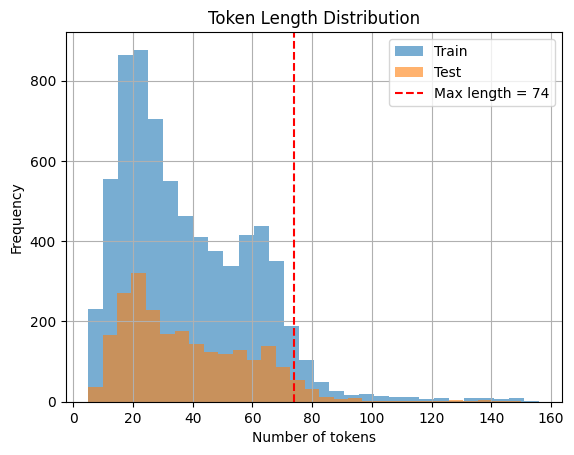

In [48]:
from datasets import Dataset
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

train_dataset = Dataset.from_pandas(train_df[['Text', 'label']])
test_dataset = Dataset.from_pandas(test_df[['Text', 'label']])

tokenizer = AutoTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")

train_token_lengths = train_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))
test_token_lengths = test_df['Text'].apply(lambda x: len(tokenizer.tokenize(x)))

print("Train token length stats:")
print(train_token_lengths.describe())
print("\nTest token length stats:")
print(test_token_lengths.describe())

suggested_max_len = int(train_token_lengths.quantile(0.95))
print(f"\nSuggested max_length (95th percentile): {suggested_max_len}")

plt.hist(train_token_lengths, bins=30, alpha=0.6, label='Train')
plt.hist(test_token_lengths, bins=30, alpha=0.6, label='Test')
plt.axvline(suggested_max_len, color='red', linestyle='--', label=f'Max length = {suggested_max_len}')
plt.title("Token Length Distribution")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
def tokenize_function(example):
    return tokenizer(example['Text'], truncation=True, padding='max_length', max_length=74)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

Map: 100%|██████████| 2354/2354 [00:00<00:00, 37271.02 examples/s]


## Modern BERT

In [50]:
from transformers.models.modernbert import ModernBertForSequenceClassification

model = ModernBertForSequenceClassification.from_pretrained(
    './modernbert-br/checkpoint-60000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of ModernBertForSequenceClassification were not initialized from the model checkpoint at ./modernbert-br/checkpoint-60000 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [51]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1272067/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.688500
20,0.636700
30,0.596800
40,0.600300
50,0.574300
60,0.540200
70,0.560600
80,0.542200
90,0.518600
100,0.516900


TrainOutput(global_step=333, training_loss=0.48304092705070795, metrics={'train_runtime': 83.0748, 'train_samples_per_second': 254.951, 'train_steps_per_second': 4.008, 'total_flos': 1043118334409760.0, 'train_loss': 0.48304092705070795, 'epoch': 3.0})

In [52]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.7702

Classification Report:
              precision    recall  f1-score   support

     against       0.78      0.85      0.81      1392
         for       0.75      0.66      0.70       962

    accuracy                           0.77      2354
   macro avg       0.77      0.75      0.76      2354
weighted avg       0.77      0.77      0.77      2354



In [53]:
from transformers.models.bert import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained(
    './bert-br/checkpoint-75000',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ./bert-br/checkpoint-75000 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [54]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1272067/2673190351.py:12: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.648000
20,0.563400
30,0.531800
40,0.522500
50,0.492100
60,0.459300
70,0.490600
80,0.472200
90,0.419300
100,0.447500


TrainOutput(global_step=333, training_loss=0.3896758123203083, metrics={'train_runtime': 59.3731, 'train_samples_per_second': 356.727, 'train_steps_per_second': 5.609, 'total_flos': 805428162669600.0, 'train_loss': 0.3896758123203083, 'epoch': 3.0})

In [55]:
# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))



Accuracy: 0.8144

Classification Report:
              precision    recall  f1-score   support

     against       0.82      0.87      0.85      1392
         for       0.80      0.73      0.76       962

    accuracy                           0.81      2354
   macro avg       0.81      0.80      0.81      2354
weighted avg       0.81      0.81      0.81      2354



In [56]:
model = BertForSequenceClassification.from_pretrained(
    'neuralmind/bert-base-portuguese-cased',
    num_labels=len(label2id),
    id2label=id2label,
    label2id=label2id
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [57]:
training_args = TrainingArguments(
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    tokenizer=tokenizer,
)

trainer.train()

/tmp/ipykernel_1272067/3931271832.py:10: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,0.662700
20,0.584700
30,0.560800
40,0.507500
50,0.489100
60,0.435200
70,0.451800
80,0.446500
90,0.426800
100,0.436800


TrainOutput(global_step=333, training_loss=0.3736200504474812, metrics={'train_runtime': 59.4344, 'train_samples_per_second': 356.359, 'train_steps_per_second': 5.603, 'total_flos': 805428162669600.0, 'train_loss': 0.3736200504474812, 'epoch': 3.0})

In [58]:
# Get predictions for test dataset
predictions = trainer.predict(test_dataset)
pred_labels = np.argmax(predictions.predictions, axis=1)
true_labels = test_dataset['label']

# Calculate and print accuracy
accuracy = accuracy_score(true_labels, pred_labels)
print(f"\nAccuracy: {accuracy:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(true_labels, pred_labels, target_names=list(label2id.keys())))


Accuracy: 0.8297

Classification Report:
              precision    recall  f1-score   support

     against       0.84      0.88      0.86      1392
         for       0.81      0.76      0.78       962

    accuracy                           0.83      2354
   macro avg       0.83      0.82      0.82      2354
weighted avg       0.83      0.83      0.83      2354

